# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **model analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `modelproject.py` file includes a function which could be used multiple times in this notebook.

Imports and set magics:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, Bounds

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject

# Model description

**Write out the model in equations here.** 

Make sure you explain well the purpose of the model and comment so that other students who may not have seen it before can follow.  

## Analytical solution

If your model allows for an analytical solution, you should provide here.

You may use Sympy for this. Then you can characterize the solution as a function of a parameter of the model.

To characterize the solution, first derive a steady state equation as a function of a parameter using Sympy.solve and then turn it into a python function by Sympy.lambdify. See the lecture notes for details. 

In [2]:
# Parameters
alpha = 0.3  # Capital share of income
beta = 0.7  # Labor share of income
A = 1  # Total factor productivity
L = 100  # Labor supply
K = 100  # Capital supply

# Production function
def production_function(L, K):
    return A * (L**alpha) * (K**beta)

# Calculate output
Y = production_function(60, 40)

# Display output
print("Output (Y):", Y)



Output (Y): 45.17387741827421


In [3]:
# Define factor intensities and productivity parameters;
# Good 1 is weighted stronger on labor than on capital, good 2 is weighted equally
alpha_1 = 0.3
alpha_2 = 0.5
beta_1 = 0.7
beta_2 = 0.5
A_home = A_foreign = 1  # Same productivity for simplicity

# Endowments in each country
K_home, L_home = 52, 48  # Capital and labor in Home country
K_foreign, L_foreign = 48, 52  # Capital and labor in Foreign country

# Objective function to maximize total production in both countries
def objective(x):
    K1H, L1H, K2H, L2H, K1F, L1F, K2F, L2F = x
    Q1H = A_home * (K1H**alpha_1) * (L1H**beta_1)
    Q2H = A_home * (K2H**alpha_2) * (L2H**beta_2)
    Q1F = A_foreign * (K1F**alpha_1) * (L1F**beta_1)
    Q2F = A_foreign * (K2F**alpha_2) * (L2F**beta_2)
    return -(Q1H + Q2H + Q1F + Q2F)  # Maximize total production

# Constraints for each country's total capital and labor
constraints = [
    {'type': 'eq', 'fun': lambda x: x[0] + x[2] - K_home},  # Home capital
    {'type': 'eq', 'fun': lambda x: x[1] + x[3] - L_home},  # Home labor
    {'type': 'eq', 'fun': lambda x: x[4] + x[6] - K_foreign},  # Foreign capital
    {'type': 'eq', 'fun': lambda x: x[5] + x[7] - L_foreign}  # Foreign labor
]

# Bounds to ensure non-negative values for capital and labor
bounds = Bounds([0, 0, 0, 0, 0, 0, 0, 0], [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf])

# Initial guesses for capital and labor allocation
initial_guess = [15, 15, 15, 15, 10, 10, 10, 10]

# Perform optimization using SLSQP method which supports bounds
result = minimize(objective, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)

if result.success:
    K1H_opt, L1H_opt, K2H_opt, L2H_opt, K1F_opt, L1F_opt, K2F_opt, L2F_opt = result.x
    print(f"Optimization Success: {result.success}")
    print(f"Home country: Good 1 (K1H = {K1H_opt:.2f}, L1H = {L1H_opt:.2f}), Good 2 (K2H = {K2H_opt:.2f}, L2H = {L2H_opt:.2f})")
    print(f"Foreign country: Good 1 (K1F = {K1F_opt:.2f}, L1F = {L1F_opt:.2f}), Good 2 (K2F = {K2F_opt:.2f}, L2F = {L2F_opt:.2f})")
else:
    print("Optimization failed:", result.message)


Optimization Success: True
Home country: Good 1 (K1H = 15.39, L1H = 23.77), Good 2 (K2H = 36.61, L2H = 24.23)
Foreign country: Good 1 (K1F = 22.94, L1F = 35.42), Good 2 (K2F = 25.06, L2F = 16.58)


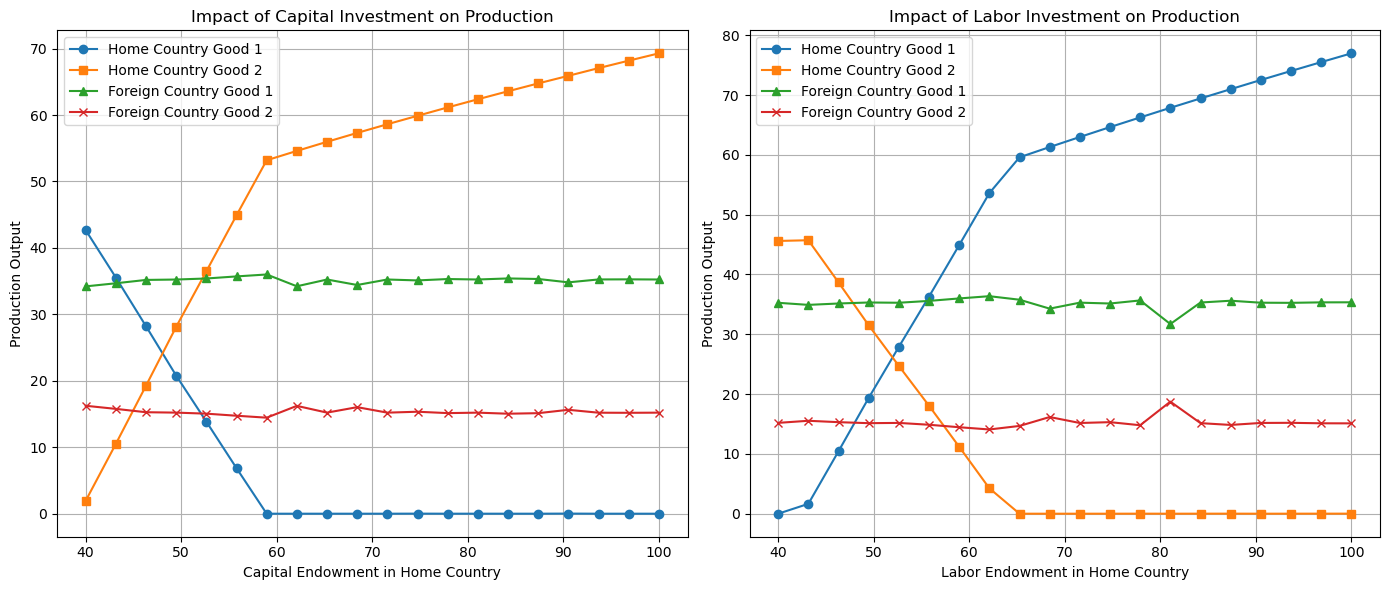

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, Bounds

# Factor intensities and productivity parameters
alpha_1 = 0.4
alpha_2 = 0.5
beta_1 = 0.6
beta_2 = 0.5
A_home = A_foreign = 1  # Same productivity for simplicity

# Range of capital and labor to vary
K_home_values = np.linspace(40, 100, 20)  # From 40 to 100 units of capital
L_home_values = np.linspace(40, 100, 20)  # From 40 to 100 units of labor

# Results lists for capital and labor variation
Q1H_results_cap = []
Q2H_results_cap = []
Q1F_results_cap = []
Q2F_results_cap = []

Q1H_results_lab = []
Q2H_results_lab = []
Q1F_results_lab = []
Q2F_results_lab = []

# Fixed foreign capital and labor endowments
K_foreign, L_foreign = 48, 52

# Loop over capital endowments
for K_home in K_home_values:
    L_home = 48  # Fixed labor for capital variation plot
    def objective(x):
        K1H, L1H, K2H, L2H, K1F, L1F, K2F, L2F = x
        Q1H = A_home * (K1H**alpha_1) * (L1H**beta_1)
        Q2H = A_home * (K2H**alpha_2) * (L2H**beta_2)
        Q1F = A_foreign * (K1F**alpha_1) * (L1F**beta_1)
        Q2F = A_foreign * (K2F**alpha_2) * (L2F**beta_2)
        return -(Q1H + Q2H + Q1F + Q2F)
    constraints = [
        {'type': 'eq', 'fun': lambda x: x[0] + x[2] - K_home},
        {'type': 'eq', 'fun': lambda x: x[1] + x[3] - L_home},
        {'type': 'eq', 'fun': lambda x: x[4] + x[6] - K_foreign},
        {'type': 'eq', 'fun': lambda x: x[5] + x[7] - L_foreign}
    ]
    bounds = Bounds([0, 0, 0, 0, 0, 0, 0, 0], [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf])
    initial_guess = [10, 10, 10, 10, 10, 10, 10, 10]
    result = minimize(objective, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)
    if result.success:
        K1H_opt, L1H_opt, K2H_opt, L2H_opt, K1F_opt, L1F_opt, K2F_opt, L2F_opt = result.x
        Q1H_results_cap.append(A_home * (K1H_opt**alpha_1) * (L1H_opt**beta_1))
        Q2H_results_cap.append(A_home * (K2H_opt**alpha_2) * (L2H_opt**beta_2))
        Q1F_results_cap.append(A_foreign * (K1F_opt**alpha_1) * (L1F_opt**beta_1))
        Q2F_results_cap.append(A_foreign * (K2F_opt**alpha_2) * (L2F_opt**beta_2))

# Loop over labor endowments
for L_home in L_home_values:
    K_home = 52  # Fixed capital for labor variation plot
    result = minimize(objective, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)
    if result.success:
        K1H_opt, L1H_opt, K2H_opt, L2H_opt, K1F_opt, L1F_opt, K2F_opt, L2F_opt = result.x
        Q1H_results_lab.append(A_home * (K1H_opt**alpha_1) * (L1H_opt**beta_1))
        Q2H_results_lab.append(A_home * (K2H_opt**alpha_2) * (L2H_opt**beta_2))
        Q1F_results_lab.append(A_foreign * (K1F_opt**alpha_1) * (L1F_opt**beta_1))
        Q2F_results_lab.append(A_foreign * (K2F_opt**alpha_2) * (L2F_opt**beta_2))

# Plotting the results for capital and labor variations
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)  # Capital plot
plt.plot(K_home_values, Q1H_results_cap, label='Home Country Good 1', marker='o')
plt.plot(K_home_values, Q2H_results_cap, label='Home Country Good 2', marker='s')
plt.plot(K_home_values, Q1F_results_cap, label='Foreign Country Good 1', marker='^')
plt.plot(K_home_values, Q2F_results_cap, label='Foreign Country Good 2', marker='x')
plt.title('Impact of Capital Investment on Production')
plt.xlabel('Capital Endowment in Home Country')
plt.ylabel('Production Output')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)  # Labor plot
plt.plot(L_home_values, Q1H_results_lab, label='Home Country Good 1', marker='o')
plt.plot(L_home_values, Q2H_results_lab, label='Home Country Good 2', marker='s')
plt.plot(L_home_values, Q1F_results_lab, label='Foreign Country Good 1', marker='^')
plt.plot(L_home_values, Q2F_results_lab, label='Foreign Country Good 2', marker='x')
plt.title('Impact of Labor Investment on Production')
plt.xlabel('Labor Endowment in Home Country')
plt.ylabel('Production Output')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## Numerical solution

You can always solve a model numerically. 

Define first the set of parameters you need. 

Then choose one of the optimization algorithms that we have gone through in the lectures based on what you think is most fitting for your model.

Are there any problems with convergence? Does the model converge for all starting values? Make a lot of testing to figure these things out. 

# Further analysis

Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

# Conclusion

Add concise conclusion. 